In [1]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #2nd function regression trees or numeric prediction
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #ensemble methods
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from dmba import adjusted_r2_score, exhaustive_search, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary, gainsChart, liftChart, AIC_score, BIC_score

%matplotlib inline 
import matplotlib.pylab as plt # for building and showing graphs.

no display found. Using non-interactive Agg backend


**Load the Stroke data set and explore the data**

In [2]:
# Create a deta frame in Python using healthcare-dataset-stroke-data.csv file
strokedata_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
strokedata_df.shape #Dimensions 5110 rows and 12 columns

(5110, 12)

In [3]:
strokedata_df.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4937,70058,Female,62.0,1,0,Yes,Self-employed,Urban,103.69,35.2,smokes,0
5092,56799,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
4783,21980,Male,9.0,0,0,No,children,Urban,66.11,16.3,Unknown,0
4588,51958,Female,62.0,1,0,No,Private,Urban,199.78,45.2,Unknown,0
2104,66680,Female,49.0,1,0,Yes,Private,Rural,65.34,39.4,never smoked,0
5023,57034,Female,37.0,0,0,No,Private,Rural,124.54,31.3,never smoked,0
2676,22231,Male,58.0,0,0,Yes,Private,Urban,199.42,29.0,never smoked,0
4881,1731,Female,80.0,0,0,No,Self-employed,Urban,72.71,29.9,never smoked,0
1223,14049,Male,8.0,0,0,No,children,Rural,115.54,28.5,Unknown,0
1148,35295,Male,69.0,0,0,Yes,Private,Urban,65.08,27.3,formerly smoked,0


In [4]:
strokedata_df.head() #the first five records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
strokedata_df.tail() #the last five records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# Use describe() function to display column statistics for the entire data set. 
np.round(strokedata_df.describe(), decimals=2)
#count of BMI shows that it has some missing values. we can impute/remove in data cleaning.

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [7]:
#To get a concise summary of the DataFrame including data types and memory usage.
strokedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
strokedata_df.describe() #statistical description of the whole data set
# count shows that BMI has some missing values - we can address this in cleanup

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
strokedata_df.dtypes # the column names and its data types
#for decsion tree we have to convert object to dummies - do it data preprocessing

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
strokedata_df.columns #the original column names
#the column names have no spaces, they look fine. But for aesthetic, we convert them to upper case

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Data Cleaning and Preprocessing**

In [11]:
#Making changes to column names
#convert column names to uppercase
strokedata_df.columns = strokedata_df.columns.str.upper()
#display column names now
print(strokedata_df.columns)

Index(['ID', 'GENDER', 'AGE', 'HYPERTENSION', 'HEART_DISEASE', 'EVER_MARRIED',
       'WORK_TYPE', 'RESIDENCE_TYPE', 'AVG_GLUCOSE_LEVEL', 'BMI',
       'SMOKING_STATUS', 'STROKE'],
      dtype='object')


In [12]:
#remove ID
strokedata_df.drop(columns=['ID'], inplace=True)

In [13]:
# Converting to dummy variables
#GENDER #EVER_MARRIED #WORK_TYPE #RESIDENCE_TYPE #SMOKING_STATUS
# The  columns are 'object'; does not have the 'category' definition.
# Need to change variable types to 'category'. 

# Columns to convert to 'category' type
categorical_columns = ['GENDER', 'EVER_MARRIED', 'WORK_TYPE', 'RESIDENCE_TYPE', 'SMOKING_STATUS']

# Convert specified columns to 'category' type
strokedata_df[categorical_columns] = strokedata_df[categorical_columns].astype('category')

# Display category levels (classes) 
print('Variable names and their category levels:')
for column in categorical_columns:
    print(column, strokedata_df[column].cat.categories)

# Convert category variables into dummy variables, 
# Use drop_first=True to drop the first dummy variable.
strokedata_df = pd.get_dummies(strokedata_df, columns=['GENDER', 'EVER_MARRIED', 'WORK_TYPE', 'RESIDENCE_TYPE', 
                                                       'SMOKING_STATUS'],dtype=int).drop(columns=['GENDER_Other', 'EVER_MARRIED_No', 
                                                                                        'WORK_TYPE_children', 
                                                                                        'RESIDENCE_TYPE_Rural', 
                                                                                        'SMOKING_STATUS_Unknown'])

#strokedata_df = pd.get_dummies(strokedata_df, prefix_sep='_', drop_first=True,dtype=int)
strokedata_df.columns


Variable names and their category levels:
GENDER Index(['Female', 'Male', 'Other'], dtype='object')
EVER_MARRIED Index(['No', 'Yes'], dtype='object')
WORK_TYPE Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object')
RESIDENCE_TYPE Index(['Rural', 'Urban'], dtype='object')
SMOKING_STATUS Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], dtype='object')


Index(['AGE', 'HYPERTENSION', 'HEART_DISEASE', 'AVG_GLUCOSE_LEVEL', 'BMI',
       'STROKE', 'GENDER_Female', 'GENDER_Male', 'EVER_MARRIED_Yes',
       'WORK_TYPE_Govt_job', 'WORK_TYPE_Never_worked', 'WORK_TYPE_Private',
       'WORK_TYPE_Self-employed', 'RESIDENCE_TYPE_Urban',
       'SMOKING_STATUS_formerly smoked', 'SMOKING_STATUS_never smoked',
       'SMOKING_STATUS_smokes'],
      dtype='object')

In [14]:
strokedata_df.columns = [s.strip().replace(' ','_') for s in strokedata_df.columns]
strokedata_df.columns
strokedata_df.columns = strokedata_df.columns.str.upper()
strokedata_df.columns

Index(['AGE', 'HYPERTENSION', 'HEART_DISEASE', 'AVG_GLUCOSE_LEVEL', 'BMI',
       'STROKE', 'GENDER_FEMALE', 'GENDER_MALE', 'EVER_MARRIED_YES',
       'WORK_TYPE_GOVT_JOB', 'WORK_TYPE_NEVER_WORKED', 'WORK_TYPE_PRIVATE',
       'WORK_TYPE_SELF-EMPLOYED', 'RESIDENCE_TYPE_URBAN',
       'SMOKING_STATUS_FORMERLY_SMOKED', 'SMOKING_STATUS_NEVER_SMOKED',
       'SMOKING_STATUS_SMOKES'],
      dtype='object')

In [15]:
# Handling missing data

#i dont wanna lose out stroke = 1 data , therefore, i am removing rows where bmi=N/A and stroke = 0
#i am imputing median bmi value =28 where bmi = N/A and stroke = 1

# Remove rows where "BMI" is missing and "STROKE" is 0
strokedata_df = strokedata_df.dropna(subset=['BMI'], how='all')  # Remove rows where "bmi" is missing
strokedata_df = strokedata_df[~((strokedata_df['BMI'].isna()) & (strokedata_df['STROKE'] == 0))]

# Impute median stroke value (28) where "BMI" is missing and "STROKE" is 1
median_stroke_value = 28
missing_bmi_mask = (strokedata_df['BMI'].isna()) & (strokedata_df['STROKE'] == 1)
strokedata_df.loc[missing_bmi_mask, 'BMI'] = median_stroke_value

# Now strokedata_df is updated with rows removed where bmi is missing and stroke is 0,
# and missing bmi values imputed with the median stroke value where stroke is 1

In [16]:
#the number of rows and columns now
print('Shape of data',strokedata_df.shape)
#count the number of stroke cases
stroke_1_count = (strokedata_df['STROKE'] == 1).sum()
print("Number of records with stroke=1 are", stroke_1_count)

#this shows that there is a high imbalance, so we will solve overfitting problem by oversampling the data 

Shape of data (4909, 17)
Number of records with stroke=1 are 209


**Obtaining data for analysis - Data Reduction**

In [17]:
#Create a random subset of the original data set with approximately 1500 records,
#where you would oversample the records of stroke=1 with the weight of 0.95,
#and the regular records would have a weight of 0.01. 
#In this case, you will receive a data set with approximately 12-13% of the data with stroke.

# Set weights for oversampling
weights = strokedata_df['STROKE'].apply(lambda x: 0.95 if x == 1 else 0.01)

# Sample the dataset with specified weights to achieve approximately 1500 records
new_stroke_df = strokedata_df.sample(n=1500, replace=True, weights=weights)

new_stroke_df.shape

(1500, 17)

**Partition Data**

In [18]:
# Create predictors X and outcome y variables.
X = new_stroke_df.drop(columns=['STROKE'])
y = new_stroke_df['STROKE']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

**Data Mining Task - Method1 - Logistic Regression**

In [19]:
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -2.505
Coefficients for Predictors
         AGE  HYPERTENSION  HEART_DISEASE  AVG_GLUCOSE_LEVEL    BMI  \
Coeff:  0.09         0.594          -0.18              0.001  0.027   

        GENDER_FEMALE  GENDER_MALE  EVER_MARRIED_YES  WORK_TYPE_GOVT_JOB  \
Coeff:         -1.244       -1.262             0.599              -2.278   

        WORK_TYPE_NEVER_WORKED  WORK_TYPE_PRIVATE  WORK_TYPE_SELF-EMPLOYED  \
Coeff:                  -1.589             -1.652                    -2.34   

        RESIDENCE_TYPE_URBAN  SMOKING_STATUS_FORMERLY_SMOKED  \
Coeff:                -0.183                           0.367   

        SMOKING_STATUS_NEVER_SMOKED  SMOKING_STATUS_SMOKES  
Coeff:                        0.162                  0.553  


In [20]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition - Logistic Regresion')
print(log_result.head(20))

Classification for Validation Partition - Logistic Regresion
      Actual  Classification    p(0)    p(1)
203        1               1  0.0639  0.9361
132        1               1  0.0578  0.9422
243        1               1  0.0338  0.9662
147        1               1  0.0490  0.9510
82         1               1  0.0676  0.9324
66         1               1  0.0445  0.9555
7          1               1  0.1760  0.8240
128        1               1  0.0396  0.9604
243        1               1  0.0338  0.9662
197        1               1  0.0914  0.9086
248        1               1  0.0537  0.9463
1953       0               1  0.1415  0.8585
61         1               1  0.0204  0.9796
5          1               1  0.0240  0.9760
36         1               1  0.0315  0.9685
166        1               1  0.3597  0.6403
26         1               1  0.0893  0.9107
145        1               1  0.0943  0.9057
1207       0               1  0.2784  0.7216
132        1               1  0.0578  0

In [21]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition Logistic Regresion')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition Logistic Regresion')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition Logistic Regresion
Confusion Matrix (Accuracy 0.8733)

       Prediction
Actual   0   1
     0  87  94
     1  20 699

Validation Partition Logistic Regresion
Confusion Matrix (Accuracy 0.8800)

       Prediction
Actual   0   1
     0  57  55
     1  17 471


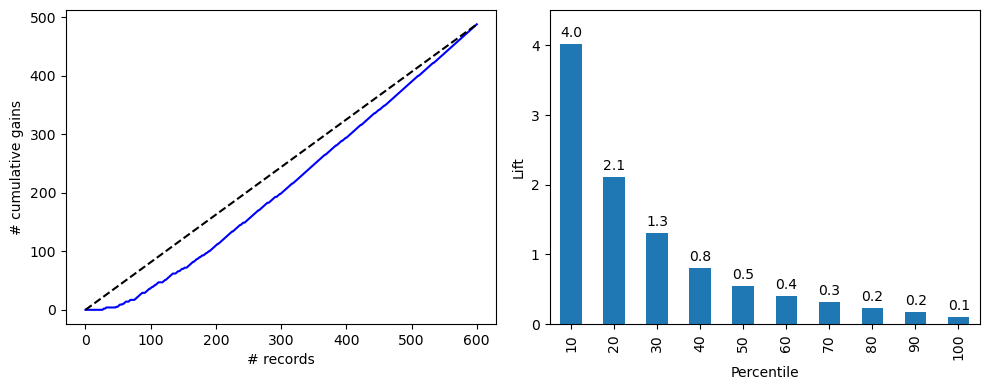

In [22]:
# Create a new df data frame from logit_result data frame
# that is sorted by p(0) in descending order.  
df = log_result.sort_values(by=['p(0)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
liftChart(df['p(0)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

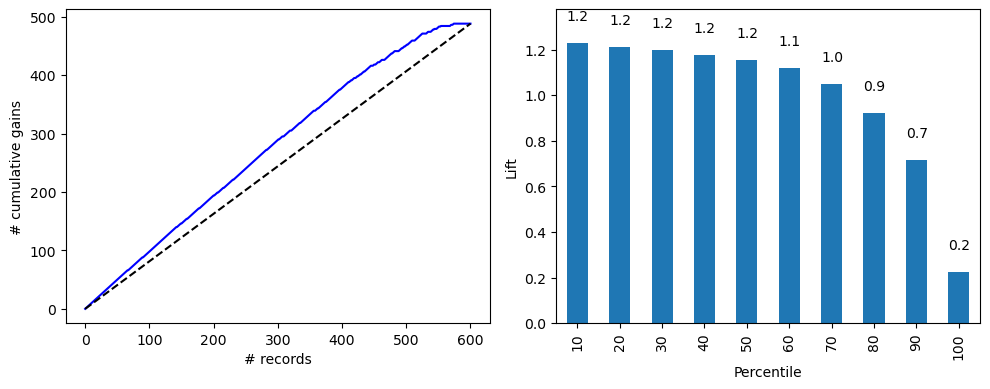

In [23]:
# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(1)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
liftChart(df['p(1)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

**Data Mining Task - Method2 - Decision Tree - Alogirthm: K-Fold**

In [33]:
# Five-fold cross-validation of the full decision tree classifier.
# Develop full classification tree.  
treeClassifier = DecisionTreeClassifier()

# Use cross_val_score() function to identify performance 
# accuracy for 5 folds (cv=5) of cross-validation partitioning.
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)

# Display performance accuracy scores for each fold partition.
# Use three decimals (.3f) for each accuracy score using the 
# acc (accumulator) parameter. 
print('Performance Accuracy of 5-Fold Cross-Validation')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

# Indetify and display two standard deviation confidence interval for 
# population mean scores.
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Performance Accuracy of 5-Fold Cross-Validation
Accuracy scores of each fold:  ['0.928', '0.911', '0.944', '0.922', '0.933']

Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.928 (+/- 0.022)


In [38]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8956
Improved parameters:  {'max_depth': 14, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


Best Classification Tree with Grid Search


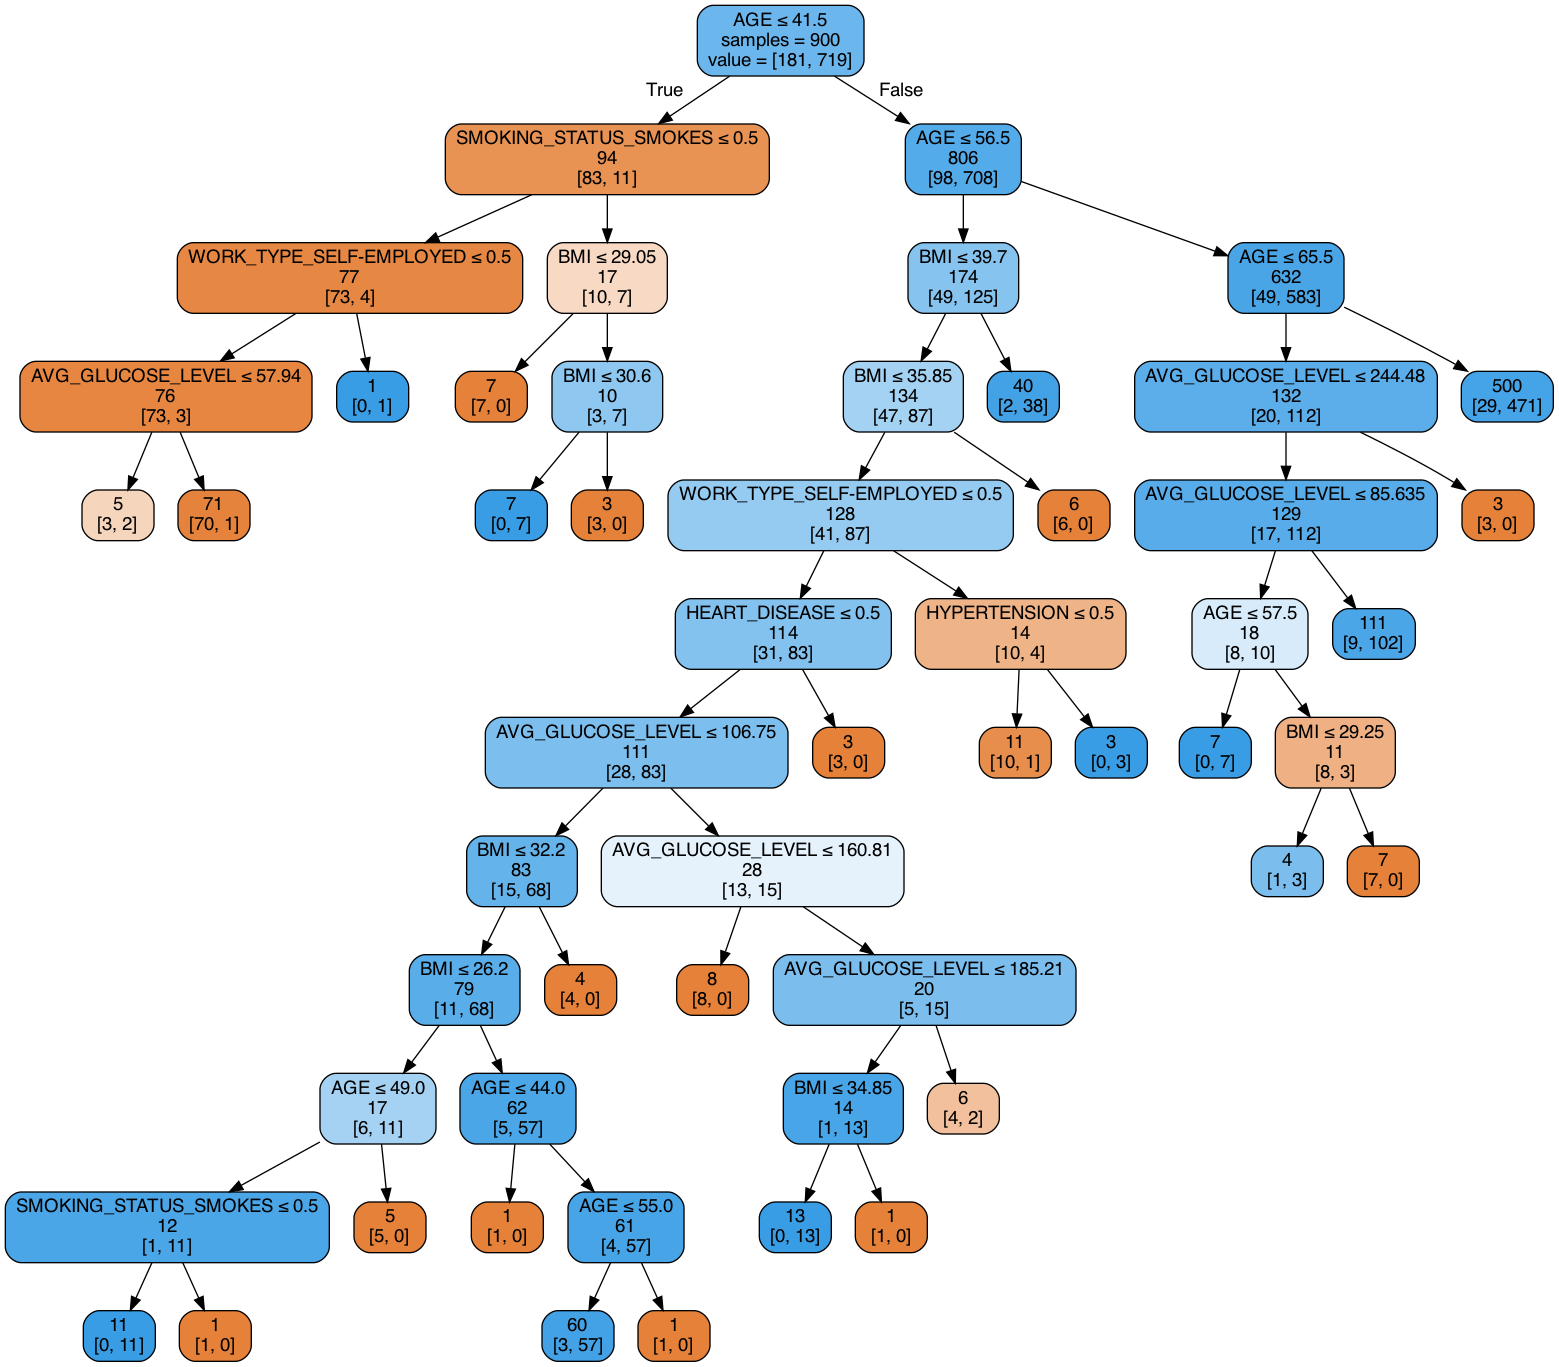

In [39]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters.
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [40]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Decision Tree')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Decision Tree')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition for Decision Tree
Confusion Matrix (Accuracy 0.9444)

       Prediction
Actual   0   1
     0 137  44
     1   6 713

Validation Partition for Decision Tree
Confusion Matrix (Accuracy 0.9217)

       Prediction
Actual   0   1
     0  76  36
     1  11 477


**Data Mining Task - Method2 - Decision Tree - Alogirthm: Random Forest**

In [29]:
# Apply RandomForestClassifier() function to develop a combined
# (ensemple) classification tree using Random Forest algorithm.
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

# Display number of nodes in Random Forest trees.
n_nodes = rf.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 201


In [30]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forests')
classificationSummary(train_y, rf.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forests')
classificationSummary(valid_y, rf.predict(valid_X))

Training Partition for Random Forests
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 181   0
     1   0 719

Validation Partition for Random Forests
Confusion Matrix (Accuracy 0.9217)

       Prediction
Actual   0   1
     0  68  44
     1   3 485
